In [1]:
from matplotlib.font_manager import json_load
import pandas as pd
import json
import os
import psycopg2 as ps
from datetime import date, datetime, timedelta
# %%
pd.set_option('display.max_columns', None)

In [2]:
#ps.connect(host=hostname,dbname=database,user=username,password=pwd,port=portid)
def connect_to_db(host_name,db_name,port,username,password):
    try:
        conn = ps.connect(
            host = hostname,
            dbname = database,
            user = username,
            password = pwd,
            port = portid
        )
    except ps.OperationalError as e:
        raise e
    else:
        print("Connected!")
    return conn


In [3]:
# %%
#Parametros para conectarnos a la base de datos
hostname = "localhost"
database = 'precios_clarosdb'
username = 'postgres'
pwd = 'postgres'
portid = 5432
#conn = None
#cur = None



In [4]:
conn = connect_to_db(hostname,database,portid,username,pwd)

Connected!


In [5]:
def query(curr):
    consulta = ("""SELECT * FROM db_python;""")
    curr.execute(consulta)

In [6]:
curr = conn.cursor()

In [7]:
query(curr)

In [8]:
query_results = curr.fetchall()

In [9]:
columnas = ['key', 'bandera_id', 'lat', 'lng',
            'sucursalnombre', 'id_', 'sucursaltipo',
            'provincia', 'promo1_descripcion','promo1_precio',
            'preciolista','promo2_descripcion','promo2_precio',
            'actualizadohoy','direccion','banderadescripcion',
            'localidad','comerciorazonsocial','comercioid','marca','nombre',
           'presentacion','fecha']

In [10]:
df = pd.DataFrame(query_results, columns=columnas)

In [11]:
df.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha
0,sucursales,1,-34.6036515,-58.405234,384 - BALVANERA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Pueyrredon 576 (Balvanera),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
1,sucursales,1,-34.6764626,-58.4933966,386 - VILLA LUGANO,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Montiel 3829 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
2,sucursales,1,-34.6530744,-58.4814134,387 - PARQUE AVELLANEDA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Olivera 1268 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
3,sucursales,1,-34.6262843,-58.4569877,389 - FLORES,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Boyaca 37 (Flores),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
4,sucursales,1,-35.0530892,-58.7606411,39 - CAÑUELAS,7790070012050,Autoservicio,AR-B,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Cl Rivadavia 800,Supermercados DIA,BUENOS AIRES,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24


In [12]:
df.describe()

,promo1_precio,preciolista,promo2_precio
count,48766.000000,883967.000000,169302.000000
mean,301.956851,300.008436,249.343296
std,97.320125,135.662823,123.814429
min,94.560000,0.000000,67.900000
25%,192.800000,167.660000,135.310000
50%,306.750000,320.100000,228.990000
75%,360.000000,383.000000,346.040000
max,602.650000,709.000000,556.400000


In [13]:
df.dtypes

key                     object
bandera_id              object
lat                     object
lng                     object
sucursalnombre          object
id_                     object
sucursaltipo            object
provincia               object
promo1_descripcion      object
promo1_precio          float64
preciolista            float64
promo2_descripcion      object
promo2_precio          float64
actualizadohoy          object
direccion               object
banderadescripcion      object
localidad               object
comerciorazonsocial     object
comercioid              object
marca                   object
nombre                  object
presentacion            object
fecha                   object
dtype: object

In [14]:
df['promo1_precio'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1153795     True
1153796     True
1153797     True
1153798     True
1153799     True
Name: promo1_precio, Length: 1153800, dtype: bool

In [15]:
df['lat'] = df['lat'].astype('float64')
df['lng'] = df['lng'].astype('float64')


In [16]:
df.describe()

,lat,lng,promo1_precio,preciolista,promo2_precio
count,875937.000000,875937.000000,48766.000000,883967.000000,169302.000000
mean,-35.328574,-60.459678,301.956851,300.008436,249.343296
std,3.861188,3.579406,97.320125,135.662823,123.814429
min,-54.830640,-72.336170,94.560000,0.000000,67.900000
25%,-34.858230,-60.947400,192.800000,167.660000,135.310000
50%,-34.618229,-58.506874,306.750000,320.100000,228.990000
75%,-34.562834,-58.423667,360.000000,383.000000,346.040000
max,-22.513508,-55.876680,602.650000,709.000000,556.400000


# Comenzamos el clustering

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [18]:
df.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha
0,sucursales,1,-34.603651,-58.405234,384 - BALVANERA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Pueyrredon 576 (Balvanera),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
1,sucursales,1,-34.676463,-58.493397,386 - VILLA LUGANO,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Montiel 3829 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
2,sucursales,1,-34.653074,-58.481413,387 - PARQUE AVELLANEDA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Olivera 1268 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
3,sucursales,1,-34.626284,-58.456988,389 - FLORES,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Boyaca 37 (Flores),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
4,sucursales,1,-35.053089,-58.760641,39 - CAÑUELAS,7790070012050,Autoservicio,AR-B,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Cl Rivadavia 800,Supermercados DIA,BUENOS AIRES,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153800 entries, 0 to 1153799
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   key                  1153800 non-null  object 
 1   bandera_id           1153800 non-null  object 
 2   lat                  875937 non-null   float64
 3   lng                  875937 non-null   float64
 4   sucursalnombre       1153800 non-null  object 
 5   id_                  1153800 non-null  object 
 6   sucursaltipo         1153800 non-null  object 
 7   provincia            1153800 non-null  object 
 8   promo1_descripcion   1153800 non-null  object 
 9   promo1_precio        48766 non-null    float64
 10  preciolista          883967 non-null   float64
 11  promo2_descripcion   1153800 non-null  object 
 12  promo2_precio        169302 non-null   float64
 13  actualizadohoy       1153800 non-null  object 
 14  direccion            1153800 non-null  object 
 15

### Factorizamos las marcas para incorporarlas como features

In [20]:
df['marca'].unique()

array(['COCINERO', 'LIRA', 'TARAGUI', 'CAÑUELAS', 'MAÑANITA', 'FAVORITA',
       'MORIXE', 'CRUZ DE MALTA', 'PLAYADITO', 'LA MERCED', 'CASERITA'],
      dtype=object)

In [21]:
df['marca'].describe()

count     1153800
unique         11
top       TARAGUI
freq       125400
Name: marca, dtype: object

In [22]:
marcas = df['marca']

In [23]:
d_marcas = pd.factorize(marcas)

In [24]:
d_marcas[0]

array([0, 0, 0, ..., 7, 2, 6], dtype=int64)

In [25]:
#Vemos tipo de datos de números factorizados
type(d_marcas[0])

numpy.ndarray

In [26]:
df_marcas_fact = pd.DataFrame(d_marcas[0], columns = ['marca_int'])
df_marcas_fact.head()

,marca_int
0,0
1,0
2,0
3,0
4,0


In [27]:
df_variables = df[['lat','lng','promo1_precio','preciolista','promo2_precio']]

In [28]:
df_variables

,lat,lng,promo1_precio,preciolista,promo2_precio
0,-34.603651,-58.405234,186.37,186.37,NaN
1,-34.676463,-58.493397,186.37,186.37,NaN
2,-34.653074,-58.481413,186.37,186.37,NaN
3,-34.626284,-58.456988,186.37,186.37,NaN
4,-35.053089,-58.760641,186.37,186.37,NaN
...,...,...,...,...,...
1153795,NaN,NaN,NaN,0.00,NaN
1153796,NaN,NaN,NaN,0.00,NaN
1153797,NaN,NaN,NaN,0.00,NaN
1153798,NaN,NaN,NaN,0.00,NaN


In [29]:
df_cluster = df_variables.join(df_marcas_fact)
df_cluster.head()

,lat,lng,promo1_precio,preciolista,promo2_precio,marca_int
0,-34.603651,-58.405234,186.37,186.37,NaN,0
1,-34.676463,-58.493397,186.37,186.37,NaN,0
2,-34.653074,-58.481413,186.37,186.37,NaN,0
3,-34.626284,-58.456988,186.37,186.37,NaN,0
4,-35.053089,-58.760641,186.37,186.37,NaN,0


In [30]:
df_cluster.describe()

,lat,lng,promo1_precio,preciolista,promo2_precio,marca_int
count,875937.000000,875937.000000,48766.000000,883967.000000,169302.000000,1.153800e+06
mean,-35.328574,-60.459678,301.956851,300.008436,249.343296,4.817733e+00
std,3.861188,3.579406,97.320125,135.662823,123.814429,3.129650e+00
min,-54.830640,-72.336170,94.560000,0.000000,67.900000,0.000000e+00
25%,-34.858230,-60.947400,192.800000,167.660000,135.310000,2.000000e+00
50%,-34.618229,-58.506874,306.750000,320.100000,228.990000,5.000000e+00
75%,-34.562834,-58.423667,360.000000,383.000000,346.040000,8.000000e+00
max,-22.513508,-55.876680,602.650000,709.000000,556.400000,1.000000e+01


In [31]:
#Revisamos los tipos de datos
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153800 entries, 0 to 1153799
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   lat            875937 non-null   float64
 1   lng            875937 non-null   float64
 2   promo1_precio  48766 non-null    float64
 3   preciolista    883967 non-null   float64
 4   promo2_precio  169302 non-null   float64
 5   marca_int      1153800 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 52.8 MB


In [32]:
#Normalizar columnas porque hay mucho desvío standard
df_cluster = (df_cluster-df_cluster.min())/(df_cluster.max()-df_cluster.min())
df_cluster

,lat,lng,promo1_precio,preciolista,promo2_precio,marca_int
0,0.625891,0.846377,0.180696,0.262863,NaN,0.0
1,0.623638,0.841021,0.180696,0.262863,NaN,0.0
2,0.624361,0.841749,0.180696,0.262863,NaN,0.0
3,0.625190,0.843233,0.180696,0.262863,NaN,0.0
4,0.611983,0.824784,0.180696,0.262863,NaN,0.0
...,...,...,...,...,...,...
1153795,NaN,NaN,NaN,0.000000,NaN,0.7
1153796,NaN,NaN,NaN,0.000000,NaN,0.7
1153797,NaN,NaN,NaN,0.000000,NaN,0.7
1153798,NaN,NaN,NaN,0.000000,NaN,0.2


In [33]:
df_cluster.describe()

,lat,lng,promo1_precio,preciolista,promo2_precio,marca_int
count,875937.000000,875937.000000,48766.000000,883967.000000,169302.000000,1.153800e+06
mean,0.603459,0.721559,0.408189,0.423143,0.371429,4.817733e-01
std,0.119478,0.217468,0.191541,0.191344,0.253458,3.129650e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.618013,0.691927,0.193352,0.236474,0.137994,2.000000e-01
50%,0.625439,0.840202,0.417623,0.451481,0.329765,5.000000e-01
75%,0.627154,0.845257,0.522427,0.540197,0.569376,8.000000e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00


In [34]:
df_cluster.keys()

Index(['lat', 'lng', 'promo1_precio', 'preciolista', 'promo2_precio',
       'marca_int'],
      dtype='object')

In [35]:
df_cluster['lat'] = df_cluster['lat'].fillna(0)
df_cluster['lng'] = df_cluster['lng'].fillna(0)
df_cluster['promo1_precio'] = df_cluster['promo1_precio'].fillna(0)
df_cluster['preciolista'] = df_cluster['preciolista'].fillna(0)
df_cluster['promo2_precio'] = df_cluster['promo2_precio'].fillna(0)
df_cluster['marca_int'] = df_cluster['marca_int'].fillna(0)

In [36]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(n_clusters = i, max_iter =300)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1,7), wcss)
plt.title("Codo de Jambú")
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #que tan similares son los individuos dentro de los clusters
plt.show()

In [ ]:
clustering = KMeans(n_clusters=3, max_iter = 300)
clustering.fit(df_cluster)

In [ ]:
df['KMeans_Clusters'] = clustering.labels_
df.head()

# Para poder ver los datos usamos PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_precios = pca.fit_transform(df_cluster)
pca_precios_df = pd.DataFrame(data = pca_precios, columns = ['Componente_1', 'Componente_2'])
pca_nombres_precios = pd.concat([pca_precios_df, df[['KMeans_Clusters']]], axis = 1)
pca_nombres_precios

In [ ]:
fig = plt.figure(figsize = (6,6))

ax= fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componete 2', fontsize = 15)
ax.set_title('Componentes principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x=pca_nombres_precios.Componente_1, y=pca_nombres_precios.Componente_2,
          c=color_theme[pca_nombres_precios.KMeans_Clusters], s=50)
plt.show()

# Probamos con un cluster por producto

In [ ]:
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters = i, max_iter =300)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1,12), wcss)
plt.title("Codo de Jambú")
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #que tan similares son los individuos dentro de los clusters
plt.show()

In [ ]:
clustering = KMeans(n_clusters=11, max_iter = 300)
clustering.fit(df_cluster)

In [ ]:
df['KMeans_Clusters'] = clustering.labels_
df.head()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_precios = pca.fit_transform(df_cluster)
pca_precios_df = pd.DataFrame(data = pca_precios, columns = ['Componente_1', 'Componente_2'])
pca_nombres_precios = pd.concat([pca_precios_df, df[['KMeans_Clusters']]], axis = 1)
pca_nombres_precios

In [ ]:
fig = plt.figure(figsize = (6,6))

ax= fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componete 2', fontsize = 15)
ax.set_title('Componentes principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange",'red','cyan', 'violet', 'gold', 'sienna', 'lightgrey', 'black', 'lime'])
ax.scatter(x=pca_nombres_precios.Componente_1, y=pca_nombres_precios.Componente_2,
          c=color_theme[pca_nombres_precios.KMeans_Clusters], s=50)
plt.show()

# Clustering con series de tiempo

In [ ]:
#But first, why is the common Euclidean distance metric is unsuitable for time series? 
#In short, it is invariant to time shifts, ignoring the time dimension of the data. 
#If two time series are highly correlated, but one is shifted by even one time step, Euclidean distance would erroneously measure them as further apart. 
#Click here for a detailed example.
#https://towardsdatascience.com/how-to-apply-k-means-clustering-to-time-series-data-28d04a8f7da3#:~:text=K%2Dmeans%20Clustering%20with%20Dynamic,computed%20with%20respect%20to%20DTW.
#http://alexminnaar.com/2014/04/16/Time-Series-Classification-and-Clustering-with-Python.html

In [ ]:
from sklearn.utils import _in_unstable_openblas_configuration
from tslearn.clustering import TimeSeriesKMeans


In [ ]:
model = TimeSeriesKMeans(n_clusters=11, metric="dtw", max_iter=10)
model.fit(df_cluster)

In [ ]:
df['KMeans_tseries_Clusters'] = clustering.labels_
df.head()

# Clustering solo un día

In [19]:
df_dia = df.copy()
df_dia['fecha'] = pd.to_datetime(df_dia['fecha'], format='%Y-%m-%d')
df_dia = df_dia.loc[df_dia['fecha'] >= '2022-8-24']

df_dia


,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha
0,sucursales,1,-34.603651,-58.405234,384 - BALVANERA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Pueyrredon 576 (Balvanera),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
1,sucursales,1,-34.676463,-58.493397,386 - VILLA LUGANO,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Montiel 3829 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
2,sucursales,1,-34.653074,-58.481413,387 - PARQUE AVELLANEDA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Olivera 1268 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
3,sucursales,1,-34.626284,-58.456988,389 - FLORES,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Boyaca 37 (Flores),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
4,sucursales,1,-35.053089,-58.760641,39 - CAÑUELAS,7790070012050,Autoservicio,AR-B,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Cl Rivadavia 800,Supermercados DIA,BUENOS AIRES,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153795,sucursales,3,NaN,NaN,NaN,7790070507389,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,CRUZ DE MALTA,Yerba Mate Hojas mas Grandes Cruz de Malta 500 Gr,500.0 gr,2022-08-24
1153796,sucursales,2,NaN,NaN,NaN,7790070507389,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,CRUZ DE MALTA,Yerba Mate Hojas mas Grandes Cruz de Malta 500 Gr,500.0 gr,2022-08-24
1153797,sucursales,1,NaN,NaN,NaN,7790070507389,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,CRUZ DE MALTA,Yerba Mate Hojas mas Grandes Cruz de Malta 500 Gr,500.0 gr,2022-08-24
1153798,sucursales,3,NaN,NaN,NaN,7790387013627,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-08-25


In [20]:
df_variables_dia = df[['lat','lng','promo1_precio','preciolista','promo2_precio','fecha']]
df_variables_dia['fecha'] = pd.to_datetime(df_variables_dia['fecha'], format='%Y-%m-%d')
df_variables_dia = df_variables_dia.loc[df_variables_dia['fecha'] >= '2022-8-24']

df_variables_dia.head()

<ipython-input-20-df29005c1590>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variables_dia['fecha'] = pd.to_datetime(df_variables_dia['fecha'], format='%Y-%m-%d')


,lat,lng,promo1_precio,preciolista,promo2_precio,fecha
0,-34.603651,-58.405234,186.37,186.37,NaN,2022-08-24
1,-34.676463,-58.493397,186.37,186.37,NaN,2022-08-24
2,-34.653074,-58.481413,186.37,186.37,NaN,2022-08-24
3,-34.626284,-58.456988,186.37,186.37,NaN,2022-08-24
4,-35.053089,-58.760641,186.37,186.37,NaN,2022-08-24


In [21]:
df_variables_dia.keys()

Index(['lat', 'lng', 'promo1_precio', 'preciolista', 'promo2_precio', 'fecha'], dtype='object')

In [22]:
d_marcas_dia = df_dia['marca'].factorize()

In [23]:
df_marcas_fact_d = pd.DataFrame(d_marcas_dia[0], columns = ['marca_int'])
df_marcas_fact_d.head()

,marca_int
0,0
1,0
2,0
3,0
4,0


In [24]:
df_cluster_d = df_variables_dia.join(df_marcas_fact_d)
df_cluster_d.head()

,lat,lng,promo1_precio,preciolista,promo2_precio,fecha,marca_int
0,-34.603651,-58.405234,186.37,186.37,NaN,2022-08-24,0.0
1,-34.676463,-58.493397,186.37,186.37,NaN,2022-08-24,0.0
2,-34.653074,-58.481413,186.37,186.37,NaN,2022-08-24,0.0
3,-34.626284,-58.456988,186.37,186.37,NaN,2022-08-24,0.0
4,-35.053089,-58.760641,186.37,186.37,NaN,2022-08-24,0.0


In [25]:
df_cluster_d = df_cluster_d.drop('fecha', axis = 1)

In [26]:
df_cluster_d['lat'] = df_cluster_d['lat'].fillna(0)
df_cluster_d['lng'] = df_cluster_d['lng'].fillna(0)
df_cluster_d['promo1_precio'] = df_cluster_d['promo1_precio'].fillna(0)
df_cluster_d['preciolista'] = df_cluster_d['preciolista'].fillna(0)
df_cluster_d['promo2_precio'] = df_cluster_d['promo2_precio'].fillna(0)
df_cluster_d['marca_int'] = df_cluster_d['marca_int'].fillna(0)

In [27]:
#Normalizar columnas porque hay mucho desvío standard
df_cluster_d = (df_cluster_d-df_cluster_d.min())/(df_cluster_d.max()-df_cluster_d.min())
df_cluster_d

,lat,lng,promo1_precio,preciolista,promo2_precio,marca_int
0,0.368899,0.192586,0.328579,0.262863,0.0,0.0
1,0.367571,0.191367,0.328579,0.262863,0.0,0.0
2,0.367998,0.191533,0.328579,0.262863,0.0,0.0
3,0.368487,0.191871,0.328579,0.262863,0.0,0.0
4,0.360703,0.187673,0.328579,0.262863,0.0,0.0
...,...,...,...,...,...,...
1153795,1.000000,1.000000,0.000000,0.000000,0.0,0.0
1153796,1.000000,1.000000,0.000000,0.000000,0.0,0.0
1153797,1.000000,1.000000,0.000000,0.000000,0.0,0.0
1153798,1.000000,1.000000,0.000000,0.000000,0.0,0.0


In [30]:
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters = i, max_iter =300)
    kmeans.fit(df_cluster_d)
    wcss.append(kmeans.inertia_)

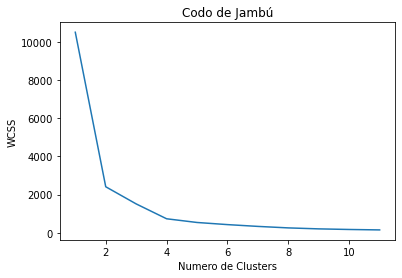

In [31]:
plt.plot(range(1,12), wcss)
plt.title("Codo de Jambú")
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #que tan similares son los individuos dentro de los clusters
plt.show()

In [32]:
clustering = KMeans(n_clusters=6, max_iter = 300)
clustering.fit(df_cluster_d)

KMeans(n_clusters=6)

In [33]:
df_dia['KMeans_Clusters'] = clustering.labels_
df_dia.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha,KMeans_Clusters
0,sucursales,1,-34.603651,-58.405234,384 - BALVANERA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Pueyrredon 576 (Balvanera),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24,4
1,sucursales,1,-34.676463,-58.493397,386 - VILLA LUGANO,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Montiel 3829 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24,4
2,sucursales,1,-34.653074,-58.481413,387 - PARQUE AVELLANEDA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Olivera 1268 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24,4
3,sucursales,1,-34.626284,-58.456988,389 - FLORES,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Boyaca 37 (Flores),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24,4
4,sucursales,1,-35.053089,-58.760641,39 - CAÑUELAS,7790070012050,Autoservicio,AR-B,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Cl Rivadavia 800,Supermercados DIA,BUENOS AIRES,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24,4


In [38]:
#labels = kmeans.predict(df_cluster_d)
labels = df_dia['KMeans_Clusters'].values
print(labels)

[4 4 4 ... 1 1 1]


In [41]:
labels.shape

(33330,)

In [43]:
f1 = df_dia['lat'].values
f1.shape

(33330,)

In [46]:
df_dia['KMeans_Clusters'].unique()

array([4, 3, 1, 0, 5, 2])

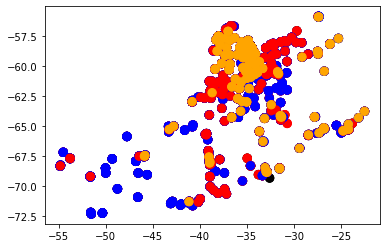

In [51]:
f1 = df_dia['lat']
f2 = df_dia['lng']
#C = kmeans.cluster_centers_
labels = df_dia['KMeans_Clusters']
col = {0:'red', 1:'green', 2:'blue', 3:'yellow',4:'orange',5:'black'}
asg = []
for row in labels:
    asg.append(col[row])
    
plt.scatter(f1,f2,c=labels.map(col), s=70)

plt.show()

In [50]:
df_dia['marca'].unique()

array(['COCINERO', 'LIRA', 'FAVORITA', 'MORIXE', 'TARAGUI',
       'CRUZ DE MALTA', 'LA MERCED', 'MAÑANITA', 'CAÑUELAS', 'CASERITA',
       'PLAYADITO'], dtype=object)

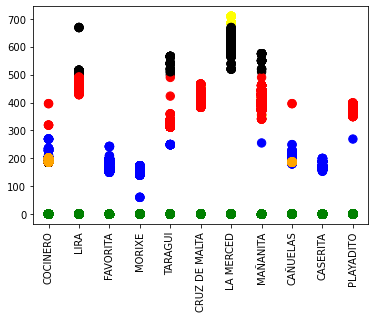

In [53]:
f1 = df_dia['marca']
f2 = df_dia['preciolista']
#C = kmeans.cluster_centers_
labels = df_dia['KMeans_Clusters']
col = {0:'red', 1:'green', 2:'blue', 3:'yellow',4:'orange',5:'black',6:'chocolate',7:'aquamarine',8:'ligtcoral',9:'magenta',10:'cyan'}
asg = []
for row in labels:
    asg.append(col[row])
    
plt.scatter(f1,f2,c=labels.map(col), s=70)
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig = plt.figure(figsize = (6,6))

ax= fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componete 2', fontsize = 15)
ax.set_title('Componentes principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange",'red','cyan', 'violet', 'gold', 'sienna', 'lightgrey', 'black', 'lime'])
ax.scatter(x=pca_nombres_precios.Componente_1, y=pca_nombres_precios.Componente_2,
          c=color_theme[pca_nombres_precios.KMeans_Clusters], s=50)
plt.show()

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_precios = pca.fit_transform(df_cluster_d)
pca_precios_df = pd.DataFrame(data = pca_precios, columns = ['Componente_1', 'Componente_2'])
pca_nombres_precios = pd.concat([pca_precios_df, df_dia[['KMeans_Clusters']]], axis = 1)
pca_nombres_precios

,Componente_1,Componente_2,KMeans_Clusters
0,0.201592,0.107472,3.0
1,0.203193,0.106903,3.0
2,0.202840,0.107029,3.0
3,0.202329,0.107211,3.0
4,0.209618,0.104613,3.0
...,...,...,...
1153795,NaN,NaN,0.0
1153796,NaN,NaN,0.0
1153797,NaN,NaN,0.0
1153798,NaN,NaN,0.0


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

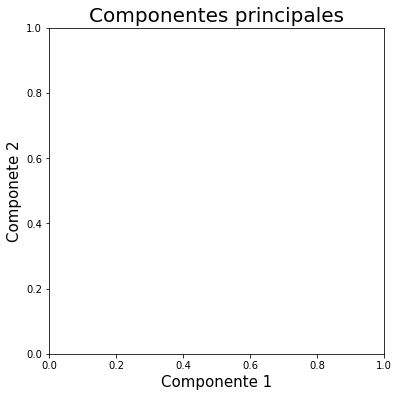

In [51]:
fig = plt.figure(figsize = (6,6))

ax= fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componete 2', fontsize = 15)
ax.set_title('Componentes principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange",'red','cyan', 'violet', 'gold', 'sienna', 'lightgrey', 'black', 'lime'])
ax.scatter(x=pca_nombres_precios.Componente_1, y=pca_nombres_precios.Componente_2,
          c=color_theme[pca_nombres_precios.KMeans_Clusters], s=50)
plt.show()